<a href="https://colab.research.google.com/github/ISL21/explorando_dados/blob/main/Explorando_dados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Exploratory DATA ANALYSIS
#    → Explorando Dados ←

SHIFT+ENTER para rodar o cod


In [ ]:
!pip install seaborn==0.9.0
import seaborn as sns
print(sns.__version__)

0.9.0


In [ ]:
import pandas as pd
notas = pd.read_csv('ratings.csv')
notas.head()


,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


o Pandas é uma biblioteca para ler arquivos em csv (mas primeiro tem q fazer o upload do arquilo)
o head mostra as 5 primeiras


In [ ]:
notas.shape


(100836, 4)

shape mostra o formato da tabela → tem 100836 avaliações e 4 colunas

In [ ]:
notas['rating'].unique()

array([4. , 5. , 3. , 2. , 1. , 4.5, 3.5, 2.5, 0.5, 1.5])

mostra os tipos de notas que existem na coluna rating

In [ ]:
notas['rating'].value_counts()

4.0    26818
3.0    20047
5.0    13211
3.5    13136
4.5     8551
2.0     7551
2.5     5550
1.0     2811
1.5     1791
0.5     1370
Name: rating, dtype: int64

quantas vezes cada notas apareceram e a frequência

In [ ]:
print('Media',notas['rating'].mean())

Media 3.501556983616962


a média das notas

In [ ]:
notas.rating

0         4.0
1         4.0
2         4.0
3         5.0
4         5.0
         ... 
100831    4.0
100832    5.0
100833    5.0
100834    5.0
100835    3.0
Name: rating, Length: 100836, dtype: float64

A impressão visual de um conjunto de dados é chamada de "plotar" (plot)
-A declaração notas.nota é uma maneira mais sintática de expressarmos os dados da coluna "nota",

<Axes: >

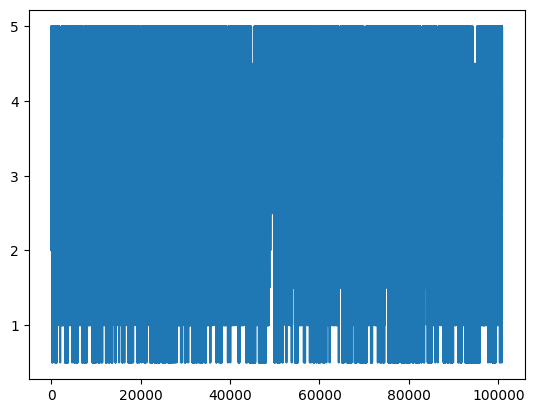

In [ ]:
notas.rating.plot()

<Axes: ylabel='Frequency'>

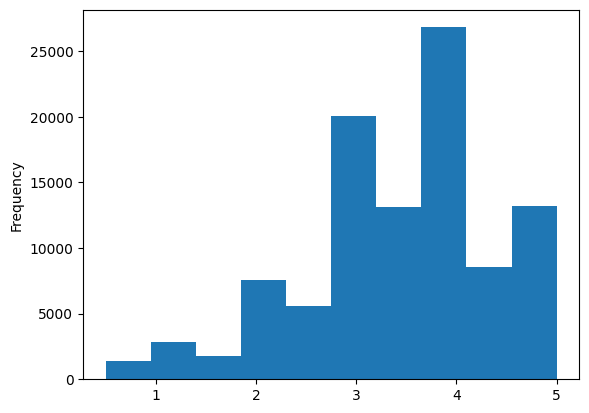

In [ ]:
notas.rating.plot(kind='hist')

In [ ]:
print('Mediana' ,notas['rating'].median())

Mediana 3.5


In [ ]:
notas.rating.describe()

count    100836.000000
mean          3.501557
std           1.042529
min           0.500000
25%           3.000000
50%           3.500000
75%           4.000000
max           5.000000
Name: rating, dtype: float64

Outra visualização que nos permite analisar esses dados é o boxplot, que descreve em uma espécie de "caixa" a posição dos valores plotados. Para gerá-lo, teremos que utilizar outra famosa biblioteca de visualização do Python: o Seaborn.

In [ ]:
import seaborn as sns


<Axes: xlabel='rating'>

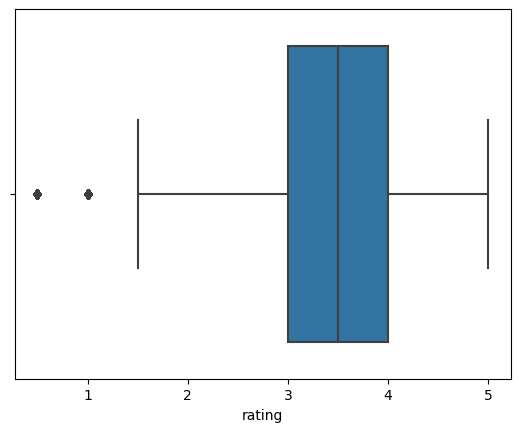

In [ ]:
sns.boxplot(notas.rating)

In [ ]:
filmes=pd.read_csv('movies.csv')
filmes.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [ ]:
notas.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [ ]:
filmes.columns=['filmeId','titulo','generos']
filmes.head()

,filmeId,titulo,generos
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [ ]:
filmes.head()

,filmeId,titulo,generos
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [ ]:
filmes.columns = ["filmeId", "titulo", "generos"]
filmes.head()

,filmeId,titulo,generos
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [ ]:
notas.columns = ["usuarioId", "filmeId", "nota", "momento"]

In [ ]:
notas.query('filmeId==1').nota

0        4.0
516      4.0
874      4.5
1434     2.5
1667     4.5
        ... 
97364    2.5
98479    4.0
98666    2.5
99497    3.0
99534    5.0
Name: nota, Length: 215, dtype: float64

In [ ]:
notas.query('filmeId==1').nota.mean()

3.9209302325581397

In [ ]:
notas.groupby('filmeId')

agrupar as notas por cada filme

In [ ]:
medias_por_filme = notas.groupby('filmeId').mean().nota
medias_por_filme.head()

filmeId
1    3.920930
2    3.431818
3    3.259615
4    2.357143
5    3.071429
Name: nota, dtype: float64

mostra a média das notas apenas da coluna notas

<Axes: ylabel='Frequency'>

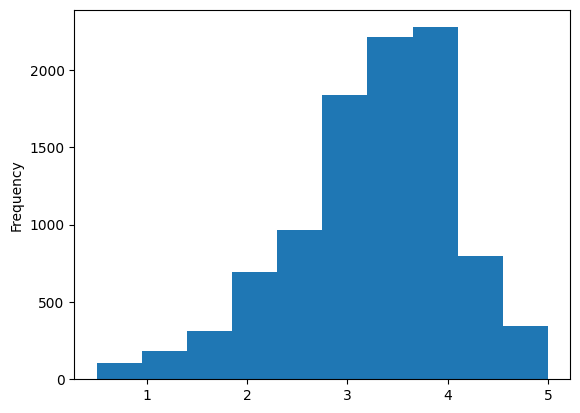

In [ ]:
medias_por_filme.plot(kind='hist')

<Axes: xlabel='nota'>

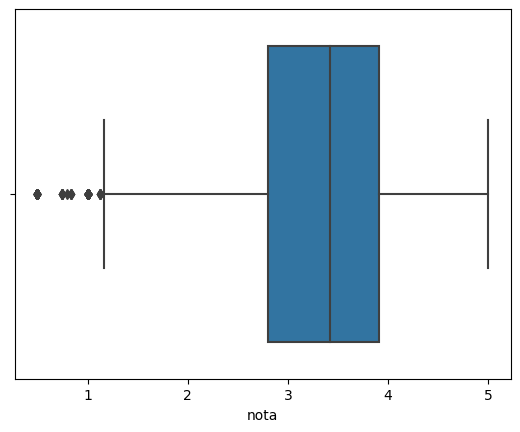

In [ ]:
sns.boxplot(x=medias_por_filme)

distribuição da media

In [ ]:
medias_por_filme.describe()


count    9724.000000
mean        3.262448
std         0.869874
min         0.500000
25%         2.800000
50%         3.416667
75%         3.911765
max         5.000000
Name: nota, dtype: float64

<Axes: xlabel='nota'>

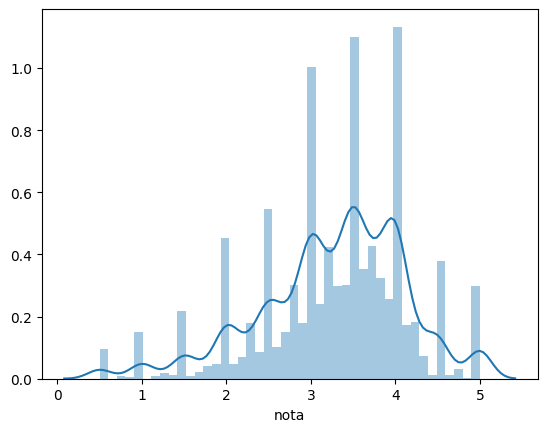

In [ ]:
sns.distplot(medias_por_filme)

<Axes: xlabel='nota'>

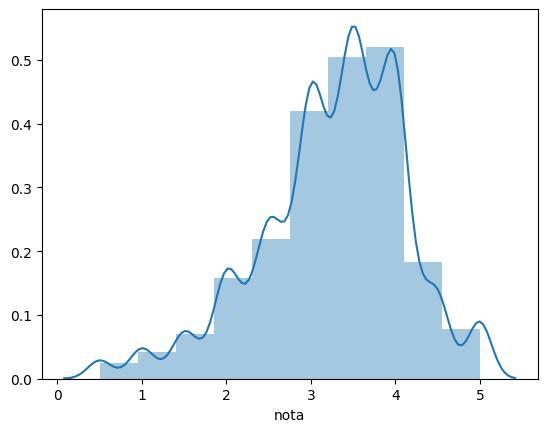

In [ ]:
sns.distplot(medias_por_filme, bins=10)

Text(0.5, 1.0, 'Histograma das medias dos filmes')

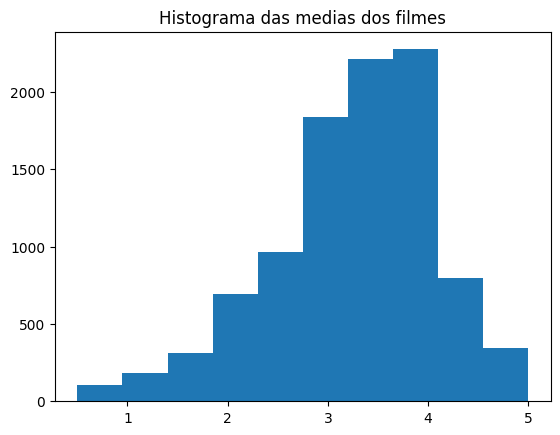

In [ ]:
import matplotlib.pyplot as plt
plt.hist(medias_por_filme)
plt.title('Histograma das medias dos filmes')

O histograma também é conhecido como "distribuição de frequências", e é representado em um gráfico de colunas ou de barras a partir de um conjunto de dados previamente tabulado e dividido em classes (uniformes ou não uniformes).

Já o boxplot, também conhecido como "diagrama de caixa", é um método alternativo para o histograma. Uma de suas particularidades é mostrar a faixa em que está concentrada a mediana dos valores.

# TIPOS DE VARIÁVEIS

As variáveis categóricas são aquelas que não possuem valores quantitativos, mas, ao contrário, são definidas por várias categorias, ou seja, representam uma classificação dos indivíduos. Podem ser nominais ou ordinais.

Quando estamos trabalhando com categorias ordinais, existe uma ordenação entre as categorias. Por exemplo: escolaridade (primeiro, segundo e terceiro graus), estágios de uma doença (inicial, intermediário, terminal), mês de observação (janeiro, fevereiro, ..., dezembro), etc.

In [ ]:
tmdb = pd.read_csv('tmdb_5000_movies.csv')
tmdb.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [ ]:
tmdb.original_language.unique()

array(['en', 'ja', 'fr', 'zh', 'es', 'de', 'hi', 'ru', 'ko', 'te', 'cn',
       'it', 'nl', 'ta', 'sv', 'th', 'da', 'xx', 'hu', 'cs', 'pt', 'is',
       'tr', 'nb', 'af', 'pl', 'he', 'ar', 'vi', 'ky', 'id', 'ro', 'fa',
       'no', 'sl', 'ps', 'el'], dtype=object)

#Vizualizando Gráficos por Categoria

In [ ]:
tmdb['original_language'].value_counts()

en    4505
fr      70
es      32
zh      27
de      27
hi      19
ja      16
it      14
cn      12
ru      11
ko      11
pt       9
da       7
sv       5
nl       4
fa       4
th       3
he       3
ta       2
cs       2
ro       2
id       2
ar       2
vi       1
sl       1
ps       1
no       1
ky       1
hu       1
pl       1
af       1
nb       1
tr       1
is       1
xx       1
te       1
el       1
Name: original_language, dtype: int64

quantas vezes aparecem cada linguagem

o toframe é pra fazer um frame(a tabela bonitinha)

o index é para transformar em coluna

In [ ]:
tmdb['original_language'].value_counts().to_frame().reset_index()

,index,original_language
0,en,4505
1,fr,70
2,es,32
3,zh,27
4,de,27
5,hi,19
6,ja,16
7,it,14
8,cn,12
9,ru,11


In [ ]:
contagem_de_lingua = tmdb['original_language'].value_counts().to_frame().reset_index()
contagem_de_lingua.columns=['original_language', 'total']
contagem_de_lingua.head()

,original_language,total
0,en,4505
1,fr,70
2,es,32
3,zh,27
4,de,27


/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:84: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_data = [np.asarray(s, np.float) for k, s in iter_data]


<Axes: >

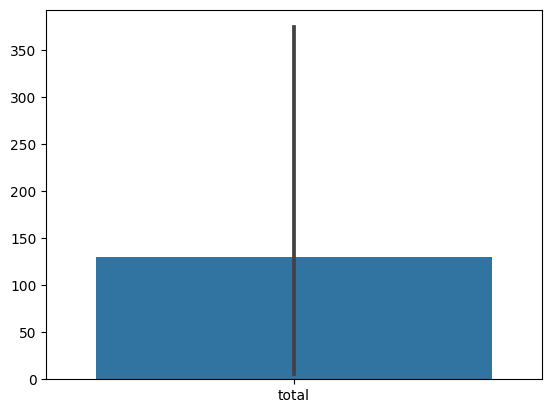

In [ ]:
sns.barplot(data=contagem_de_lingua)

x e y são os eixos(nao da pra fazer se for só uma serie, mas como foi feita as colunas da)

<Axes: xlabel='original_language', ylabel='total'>

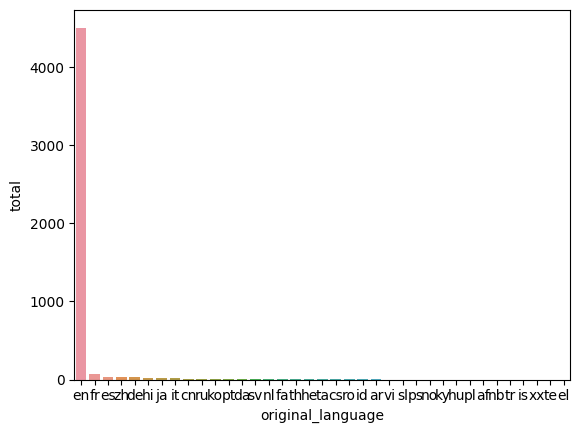

In [ ]:
sns.barplot(x='original_language',y='total',data=contagem_de_lingua)

Uma forma mais simples para fazer todo o procedimento feito anteriormente desde a importação dos dados

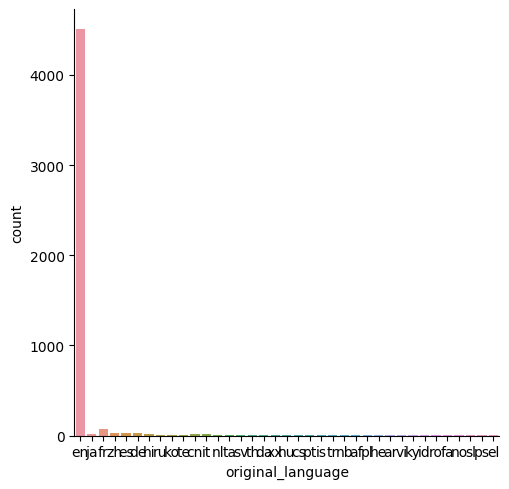

In [ ]:
sns.catplot('original_language',kind='count', data = tmdb)

#Como passar uma mensagem através da visualização

gráfico de torta (pie) → quase não se é usado

([<matplotlib.patches.Wedge at 0x7faeed046020>,
 [Text(-1.0791697536499925, 0.2130554923183512, 'en'),
  Text(1.0355355017029462, -0.3710339940124459, 'fr'),
  Text(1.0579676486019882, -0.3011718023181785, 'es'),
  Text(1.0687996606645356, -0.26012936274741094, 'zh'),
  Text(1.0773191105706255, -0.22222406260195313, 'de'),
  Text(1.0835167978583342, -0.18971386021801853, 'hi'),
  Text(1.0875756432724297, -0.16486121484618815, 'ja'),
  Text(1.0906010773146022, -0.14348968659882622, 'it'),
  Text(1.092883487371409, -0.12492270822755745, 'cn'),
  Text(1.0946390911069936, -0.10846778425161549, 'ru'),
  Text(1.0960865535188649, -0.09270527058984593, 'ko'),
  Text(1.0972054830031333, -0.07835896928789601, 'pt'),
  Text(1.097965443340663, -0.06687215586282344, 'da'),
  Text(1.0984565010300316, -0.05825217030171998, 'sv'),
  Text(1.0987803851616647, -0.0517847968421653, 'nl'),
  Text(1.0990363161210686, -0.04603450713357274, 'fa'),
  Text(1.0992355702663055, -0.04100196411527794, 'th'),
  Text

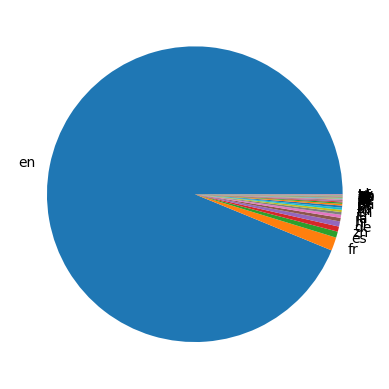

In [ ]:
plt.pie(contagem_de_lingua['total'],labels = contagem_de_lingua['original_language'])


In [ ]:
total_por_lingua = tmdb['original_language'].value_counts()
total_geral = total_por_lingua.sum()
total_de_ingles = total_por_lingua.loc['en']
total_do_resto = total_geral - total_de_ingles
print(total_de_ingles,total_do_resto)

4505 298


Criando um DICIONARIO

<Axes: xlabel='lingua', ylabel='total'>

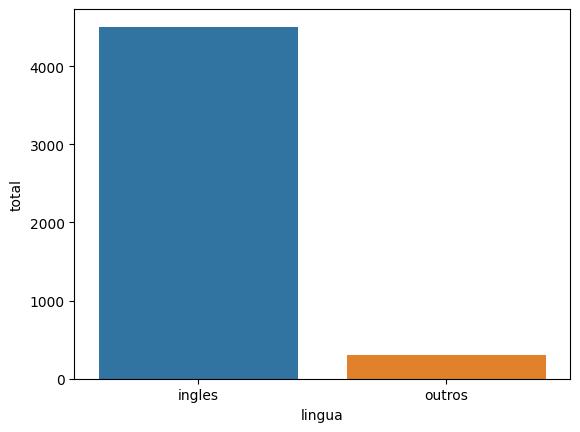

In [ ]:
dados = {
    'lingua' : ['ingles','outros'],
    'total' : [total_de_ingles,total_do_resto]

}
dados = pd.DataFrame(dados)
sns.barplot( x='lingua', y='total', data=dados)

Visualizando as outras categorias

Uma query é como fazer uma pergunta
por ex: 'quais filmes com a lingua original diferente de ingles?'


In [ ]:
tmdb.query("original_language != 'en'")

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
97,15000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",NaN,315011,"[{""id"": 1299, ""name"": ""monster""}, {""id"": 7671,...",ja,シン・ゴジラ,From the mind behind Evangelion comes a hit la...,9.476999,"[{""name"": ""Cine Bazar"", ""id"": 5896}, {""name"": ...","[{""iso_3166_1"": ""JP"", ""name"": ""Japan""}]",2016-07-29,77000000,120.0,"[{""iso_639_1"": ""it"", ""name"": ""Italiano""}, {""is...",Released,A god incarnate. A city doomed.,Shin Godzilla,6.5,143
235,97250400,"[{""id"": 14, ""name"": ""Fantasy""}, {""id"": 12, ""na...",http://www.asterixauxjeuxolympiques.com/index.php,2395,"[{""id"": 271, ""name"": ""competition""}, {""id"": 12...",fr,Astérix aux Jeux Olympiques,Astérix and Obélix have to win the Olympic Gam...,20.344364,"[{""name"": ""Constantin Film"", ""id"": 47}, {""name...","[{""iso_3166_1"": ""BE"", ""name"": ""Belgium""}, {""is...",2008-01-13,132900000,116.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,NaN,Asterix at the Olympic Games,5.0,471
317,94000000,"[{""id"": 18, ""name"": ""Drama""}, {""id"": 36, ""name...",http://www.theflowersofwarmovie.com/,76758,"[{""id"": 173251, ""name"": ""forced prostitution""}...",zh,金陵十三釵,A Westerner finds refuge with a group of women...,12.516546,"[{""name"": ""Beijing New Picture Film Co. Ltd."",...","[{""iso_3166_1"": ""CN"", ""name"": ""China""}, {""iso_...",2011-12-15,95311434,145.0,"[{""iso_639_1"": ""zh"", ""name"": ""\u666e\u901a\u8b...",Released,NaN,The Flowers of War,7.1,187
474,0,"[{""id"": 9648, ""name"": ""Mystery""}, {""id"": 18, ""...",NaN,330770,"[{""id"": 428, ""name"": ""nurse""}, {""id"": 658, ""na...",fr,Évolution,11-year-old Nicolas lives with his mother in a...,3.300061,"[{""name"": ""Ex Nihilo"", ""id"": 3307}, {""name"": ""...","[{""iso_3166_1"": ""BE"", ""name"": ""Belgium""}, {""is...",2015-09-14,0,81.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""}]",Released,NaN,Evolution,6.4,47
492,8000000,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 16, ""nam...",NaN,293644,"[{""id"": 209714, ""name"": ""3d""}]",es,Don Gato: El inicio de la pandilla,Top Cat has arrived to charm his way into your...,0.719996,"[{""name"": ""Anima Estudios"", ""id"": 9965}, {""nam...","[{""iso_3166_1"": ""IN"", ""name"": ""India""}, {""iso_...",2015-10-30,0,89.0,[],Released,NaN,Top Cat Begins,5.3,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4739,0,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 10749, ""...",NaN,90414,"[{""id"": 187056, ""name"": ""woman director""}]",fr,"I Love You, Don't Touch Me!","The story of a 25 year old virgin girl, lookin...",0.020839,[],"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",1997-01-21,0,86.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Just Your Typical Boy-Loves-Girl Who Doesn't L...,"I Love You, Don't Touch Me!",6.0,1
4751,0,"[{""id"": 18, ""name"": ""Drama""}, {""id"": 10749, ""n...",NaN,42109,[],pt,"Gabriela, Cravo e Canela","In 1925, Gabriela becomes cook, mistress, and ...",0.557602,"[{""name"": ""United Artists"", ""id"": 60}, {""name""...","[{""iso_3166_1"": ""BR"", ""name"": ""Brazil""}]",1983-03-24,0,99.0,"[{""iso_639_1"": ""pt"", ""name"": ""Portugu\u00eas""}]",Released,NaN,Gabriela,6.0,2
4790,0,"[{""id"": 18, ""name"": ""Drama""}, {""id"": 10769, ""n...",NaN,13898,[],fa,دایره,Various women struggle to function in the oppr...,1.193779,"[{""name"": ""Jafar Panahi Film Productions"", ""id...","[{""iso_3166_1"": ""IR"", ""name"": ""Iran""}]",2000-09-08,0,90.0,"[{""iso_639_1"": ""fa"", ""name"": ""\u0641\u0627\u06...",Released,NaN,The Circle,6.6,17
4792,20000,"[{""id"": 80, ""name"": ""Crime""}, {""id"": 27, ""name...",NaN,36095,"[{""id"": 233, ""name"": ""japan""}, {""id"": 549, ""na...",ja,キュア,A wave of grueso

In [ ]:
total_lingua_outros = tmdb.query("original_language != 'en'").original_language.value_counts()
total_lingua_outros



fr    70
es    32
zh    27
de    27
hi    19
ja    16
it    14
cn    12
ko    11
ru    11
pt     9
da     7
sv     5
fa     4
nl     4
he     3
th     3
ro     2
id     2
ar     2
cs     2
ta     2
tr     1
nb     1
af     1
pl     1
is     1
hu     1
vi     1
ky     1
xx     1
te     1
no     1
sl     1
ps     1
el     1
Name: original_language, dtype: int64

<Figure size 500x1000 with 0 Axes>

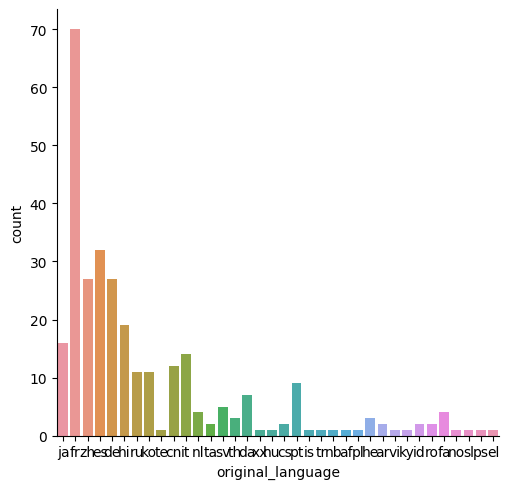

In [ ]:
filmes_sem_lingua_ingles = tmdb.query("original_language != 'en'")
sns.catplot('original_language',kind='count', data = filmes_sem_lingua_ingles)

REFINANDO visualizações

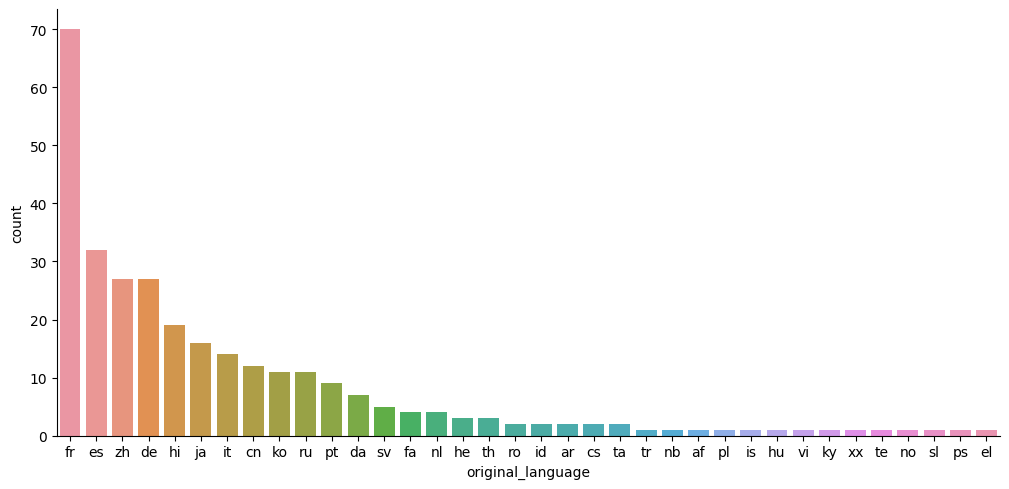

In [ ]:
filmes_sem_lingua_ingles = tmdb.query("original_language != 'en'")
sns.catplot('original_language',kind='count',
            data = filmes_sem_lingua_ingles,aspect=2,
            order=total_lingua_outros.index)


CORES   (entrar na documentação de palette)

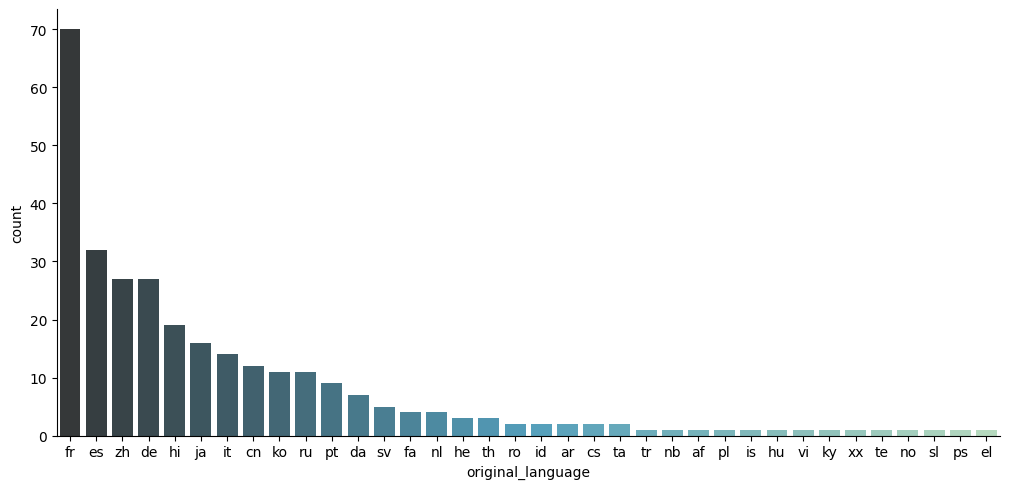

In [ ]:
filmes_sem_lingua_ingles = tmdb.query("original_language != 'en'")
sns.catplot('original_language',kind='count',
            data = filmes_sem_lingua_ingles,aspect=2,
            palette='GnBu_d',
            order=total_lingua_outros.index)

# Revisando o papel da média, mediana, medidas de tendencia central, dispersão, desvio padrao, box plot, histograma

#Grafico LINEAR (exemplo)

In [ ]:
''''import seaborn as sns
sns.set(style="ticks")

# Load the example dataset for Anscombe's quartet
df = sns.load_dataset("anscombe")

# Show the results of a linear regression within each dataset
sns.lmplot(x="x", y="y", col="dataset", hue="dataset", data=df,
           col_wrap=2, ci=None, palette="muted", height=4,
           scatter_kws={"s": 50, "alpha": 1})'''''

Visualização de cada filme separadamente

In [ ]:
notas_toy_story = notas.query('filmeId == 1')
notas_jumanji = notas.query('filmeId == 2')
print(len(notas_toy_story), len(notas_jumanji))

215 110


In [ ]:
print('Nota média do Toy Story %.2f ' % notas_toy_story.nota.mean() )
print('Nota média do Jumanji %.2f' % notas_jumanji.nota.mean() )

Nota média do Toy Story 3.92 
Nota média do Jumanji 3.43


#Outras formas de visualizar os dados

NumPy → uma biblioteca que já vem instalada no Colab e que muitas vezes é utilizada nas operações do Pandas.

<Axes: xlabel='nota'>

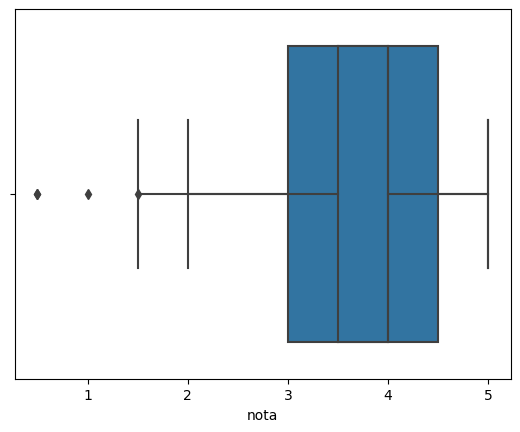

In [ ]:
sns.boxplot(notas_toy_story.nota)
sns.boxplot(notas_jumanji.nota)

{'whiskers': [<matplotlib.lines.Line2D at 0x7faee2fe7b50>,
 'caps': [<matplotlib.lines.Line2D at 0x7faee2fe6860>,
 'boxes': [<matplotlib.lines.Line2D at 0x7faee2fe7400>,
 'medians': [<matplotlib.lines.Line2D at 0x7faee38c2620>,
 'fliers': [<matplotlib.lines.Line2D at 0x7faee38791e0>,
 'means': []}

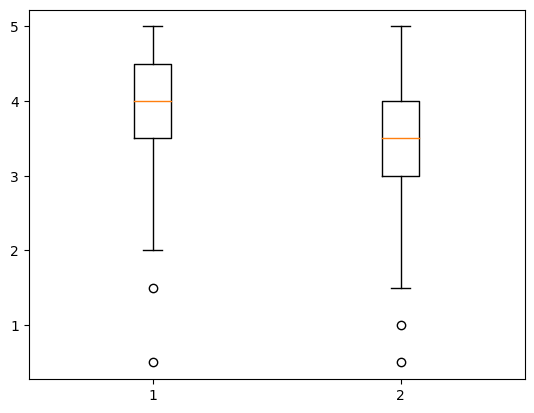

In [ ]:
plt.boxplot((notas_toy_story.nota, notas_jumanji.nota))

<Axes: xlabel='filmeId', ylabel='nota'>

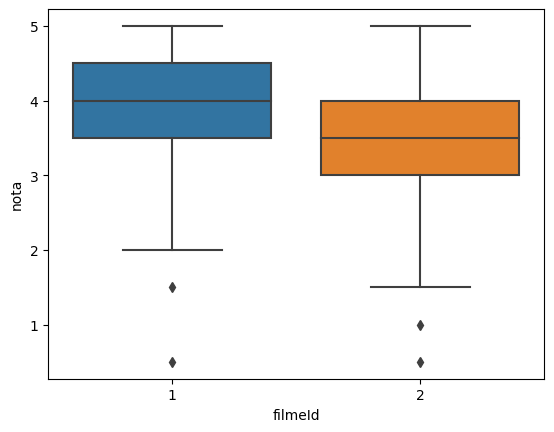

In [ ]:
sns.boxplot(x='filmeId',y='nota', data = notas.query('filmeId in [1,2]'))

std é o DESVIO Padrão → tendência de DISPERSÃO (quer dizer quando o padrão é quebrado)

ANALISES Exploratorias de dados

In [ ]:
print(notas_jumanji.nota.std() , notas_toy_story.nota.std())

0.8817134921476455 0.8348591407114047
